In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qhlib import functions as qfn

## Ramsey and echo window functions

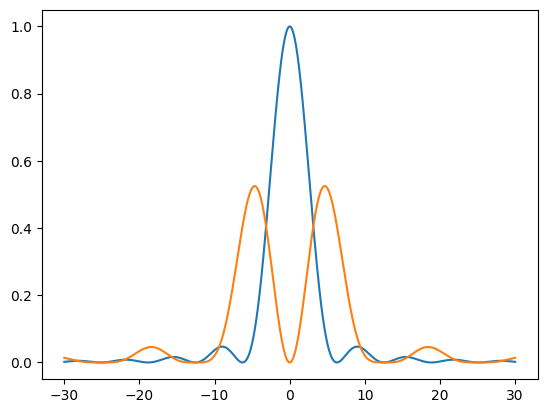

In [9]:
# x = omega t
def ramsey_window(x):
    return (np.sin(x/2) / (x/2))**2

def echo_window(x):
    return (np.sin(x/4)**2 / (x/4))**2


x = np.linspace(-30, 30, 1000)
plt.plot(x, ramsey_window(x))
plt.plot(x, echo_window(x))


## Sideband rabi flop for thermal states

7
38
146


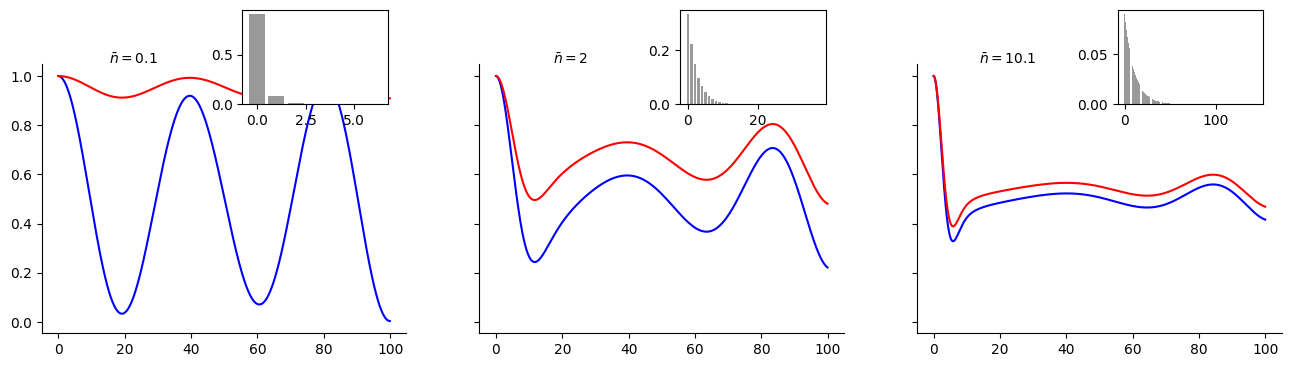

In [3]:
t = np.arange(0.0, 100.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
nbars = [0.1, 2, 10.1]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3.5), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, nbar in zip(axes, nbars):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = qfn.thermal_state_nmax(nbar, 1e-7)
    print(nmax)

    n = np.arange(nmax)
    p = qfn.thermal_state_populations(n, nbar)

    ax.plot(t, qfn.thermal_bsb_rabi_flop(t, Omega, eta, nbar, nmax), color="b")
    ax.plot(t, qfn.thermal_rsb_rabi_flop(t, Omega, eta, nbar, nmax), color="r")
    ax.text(0.25, 1, f"$\\bar n = {nbar}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Sideband rabi flop for coherent states
(only BSB)

50
50
50


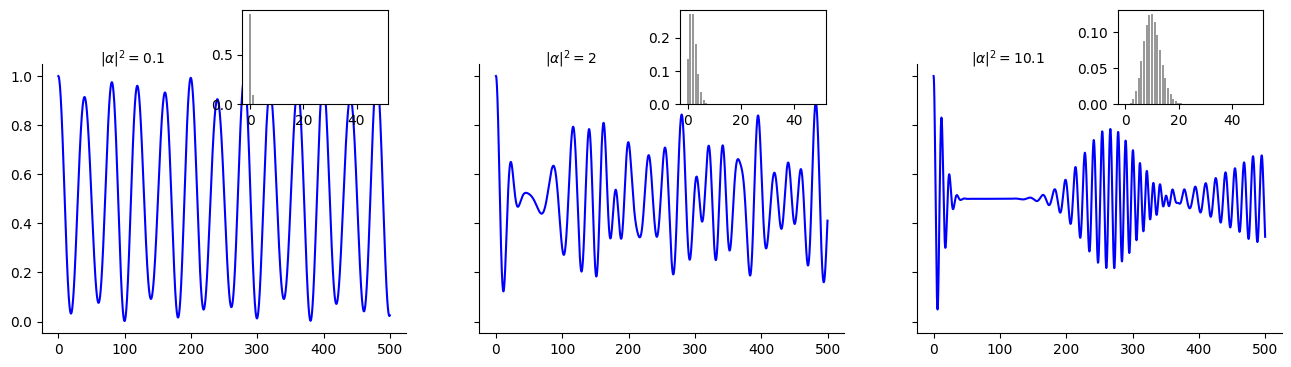

In [4]:
from qhlib import functions as qfn


t = np.arange(0.0, 500.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
alpha2s = [0.1, 2, 10.1]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3.5), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, alpha2 in zip(axes, alpha2s):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = 50
    print(nmax)

    n = np.arange(nmax)
    p = qfn.coherent_state_populations(n, alpha2)

    ax.plot(t, qfn.coherent_bsb_rabi_flop(t, Omega, eta, alpha2, nmax), color="b")
    ax.text(0.25, 1, f"$|\\alpha|^2 = {alpha2}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Thermal carrier rabi flops

38
144
387


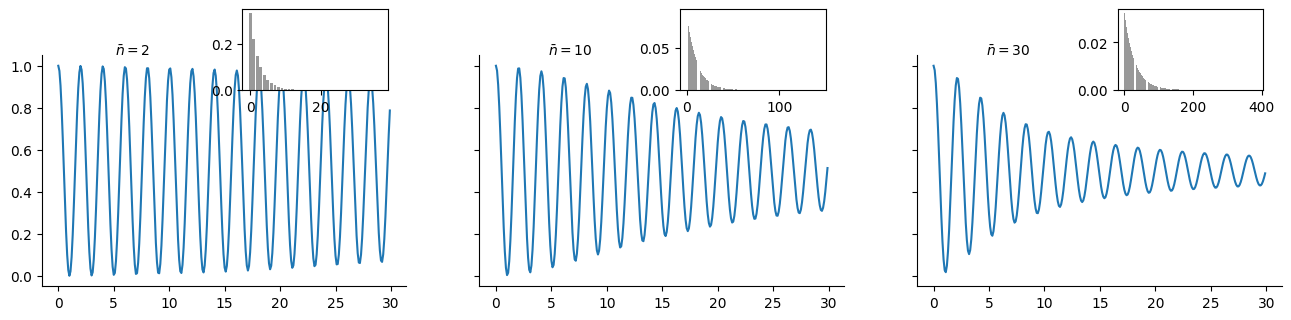

In [5]:
t = np.arange(0.0, 30.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
nbars = [2, 10, 30]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, nbar in zip(axes, nbars):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = qfn.thermal_state_nmax(nbar, 1e-7)
    print(nmax)

    n = np.arange(nmax)
    p = qfn.thermal_state_populations(n, nbar)

    ax.plot(t, qfn.thermal_carrier_rabi_flop(t, Omega, eta, nbar, nmax))
    ax.text(0.25, 1, f"$\\bar n = {nbar}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Motional Ramsey - $P_0$

[Text(0.5, 0, '$\\delta t$'), Text(0, 0.5, '$P_0$')]

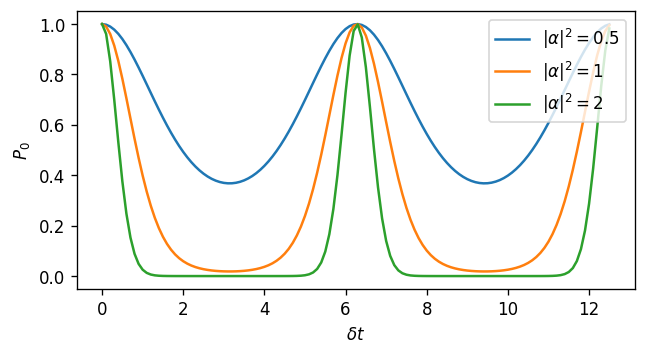

In [6]:
x = np.arange(0, 4*np.pi, 0.1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
for a in [0.5, 1, 2]:
    y = np.exp(-2 * a**2 * (1 - np.cos(x)))

    ax.plot(x, y, label=f"$|\\alpha|^2 = {a}$")

ax.legend(loc="upper right")
ax.set(xlabel="$\delta t$", ylabel="$P_0$")